# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Hilma Minanur Rohman
- **Email:** m.hilmaminanurrohman78@gmail.com
- **ID Dicoding:** hilmarohman

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pengguna layanan bike-sharing dalam beberapa tahun terakhir?
- Bagaimana pola penggunaan layanan bike-sharing berdasarkan waktu?
- Pada musim apa jumlah pengguna bike-sharing paling banyak?
- Bagaimana pola penggunaan layanan bike-sharing berdasarkan hari dalam seminggu?
- Apakah ada hubungan antara suhu yang terjadi saat menggunakan layanan bike-sharing?
- Apakah cuaca mempengaruhi penggunaan bikeshare?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling
---

### Gathering Data

Memuat dataset. Untuk memudahkan penggunaan dataset saya mengunggah dataset ke github sehingga dataset dapat dimuat secara langsung melalui tautan

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HilmaRohman/dicoding-data/refs/heads/main/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Beberapa teknik dilakukan untuk memeriksa karakteristik data, misalnya memeriksa nilai yang duplikat, missing value, memeriksa nilai yang tidak sesuai dan lain-lain

### Cek tipe data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Kita akan mengubah variabel `dteday` menjadi tipe data date
- Variabel `season`, `weekday`, dan `mnth` diubah merupakan bilangan bulat, sehingga akan kita ubah menjadi string
- Variabel `yr` menyebutkan bahwa 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya menjadi string.

### Cek missing value

In [4]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada nilai yang hilang dalam dataset

### Cek nilai duplikat

In [5]:
df.duplicated().sum()

0

Dalam data tersebut tidak ada nilai dupllikat

### Cek Statistik Data

In [6]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [7]:
print(df.shape)

(17379, 17)


- Dataset ini terdiri dari 17.379 baris dan 17 kolom
- Seperti yang dijelaskan dalam kamus dataset, variabel `temp`, `atemp`, `hum`, dan `windspeed` sudah dilakukan dinormalisasi.

### Cleaning Data

Melakukan pembersihan data berdasarkan hal-hal yang telah diidentifikasi

### Konversi `dteday` menjadi datetime

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [9]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### memastikan nilai dari variabel `season`, `weekday` dan `month`

Mengubah nilai `weekday` dari integer menuju string berdasarkan variabel `dteday`

In [10]:
df['weekday'] = df['dteday'].dt.day_name()

In [11]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


Mengubah nilai `mnth` dari integer menuju string berdasarkan variabel `dteday`

In [12]:
df['mnth'] = df['dteday'].dt.month_name()

In [13]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


Mengganti nilai variabel `season` menjadi string berdasarkan kategorisasinya

In [14]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)

df['season'] = season_list

In [15]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Mengubah nilai variabel `yr` menjadi nilai yang sebenarnya

In [16]:
df['yr'] = df['dteday'].dt.year

In [17]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Membetulkan nilai `temp`, `atemp`, `hum`, and `windspeed` menjadi nilai sebelum dinormalisasi

In [18]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

In [19]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


### Menyimpan data yang telah dibersihkan

Setelah data tersebut dibersihkan, agar dapat digunakan di masa mendatang. Termasuk pembuatan dashboard

In [20]:
df.to_csv("cleaned_dataset.csv", index=False)

## Exploratory Data Analysis
---

In [21]:
df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
hr,int64
holiday,int64
weekday,object
workingday,int64
weathersit,int64


### Univariate Analysis

### Histogram

In [22]:
# extract the 4 float variables
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


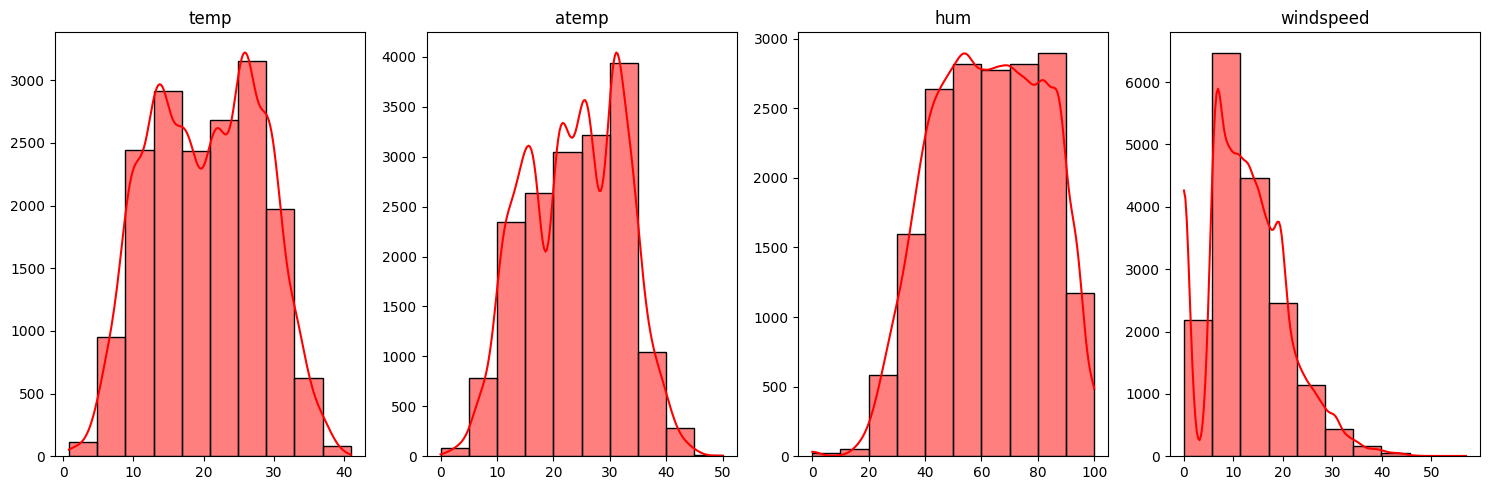

In [23]:
# create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# iterate over the float variables and create a histogram for each one
for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='red')

    # set the title and labels
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

# adjust the layout of the subplots
plt.tight_layout()

plt.show()

### Boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


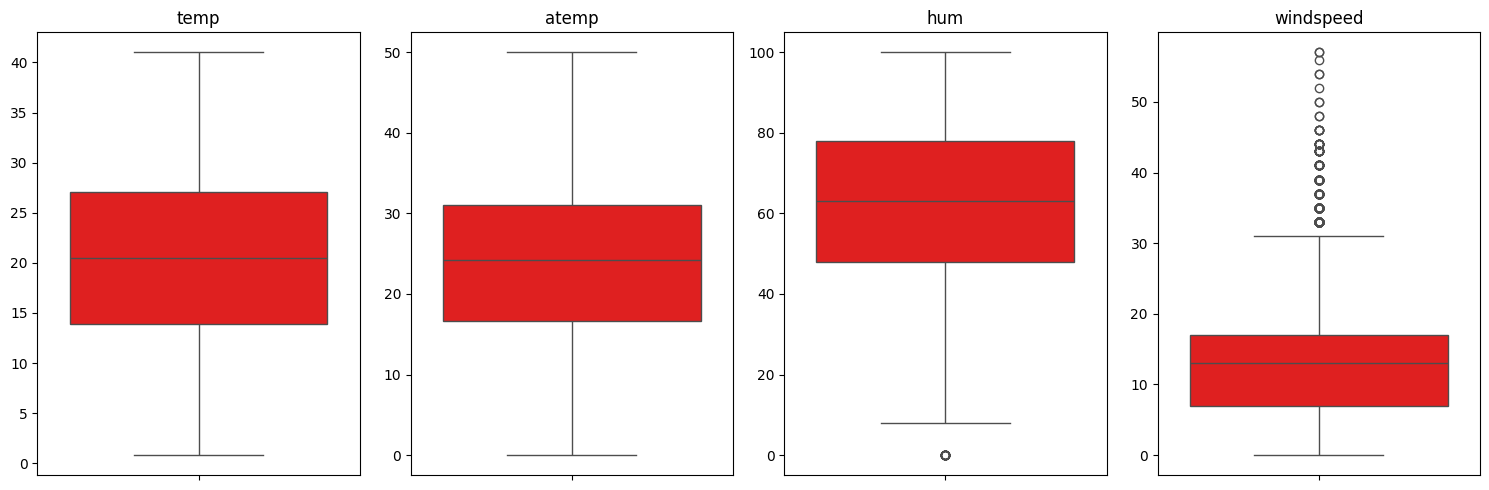

In [24]:
# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the float variables and create a boxplot for each one
for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='red')

    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

### Histogram dan Boxplot dari pengguna bikeshare

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


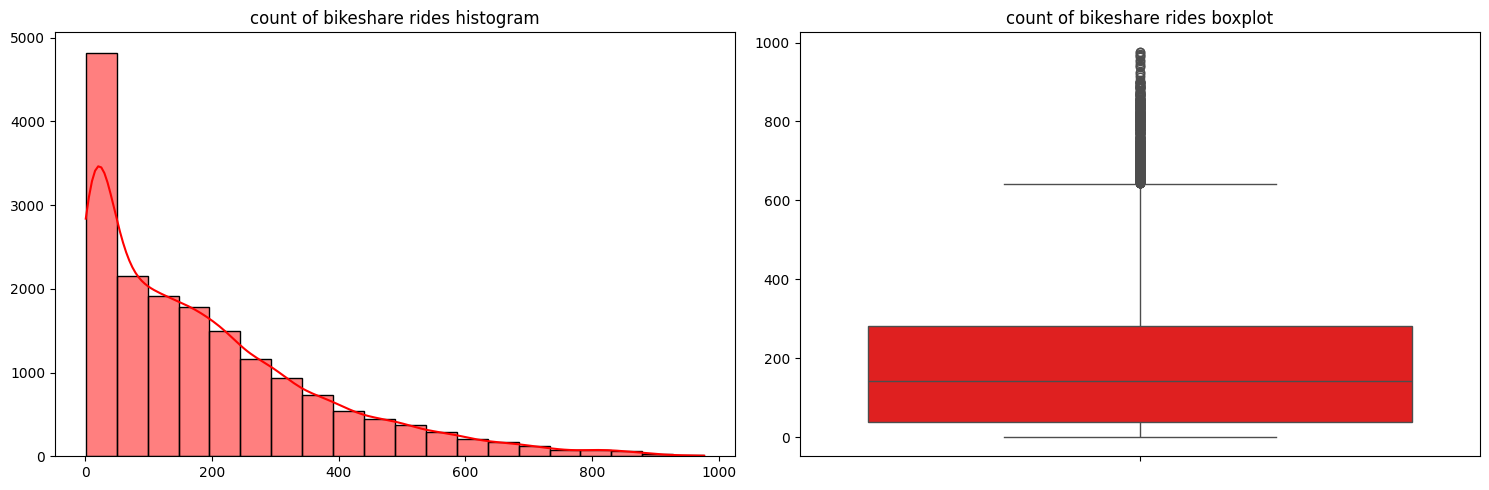

In [25]:
# Create a figure and 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(df['cnt'], kde=True, bins=20, ax = axs[0], color='red')
axs[0].set_title("count of bikeshare rides histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=df['cnt'], ax = axs[1], color='red')
axs[1].set_title("count of bikeshare rides boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")


# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

- Histogram untuk `temp`, `atemp`, dan `hum` menunjukkan distribusi normal, sedangkan untuk `windspeed` miring ke kanan. Kita juga dapat menyimpulkan hal ini dengan mengamati nilai mean dan median pada setiap variabel.
- Boxplot untuk `temp`, `atemp`, dan `hum` tidak menunjukkan adanya outlier, sedangkan untuk `windspeed` terdapat outlier.
- Histogram untuk jumlah perjalanan bikeshare miring ke kanan. Terdapat juga pencilan yang teramati pada boxplot.
- Meskipun terdapat outlier pada variabel `windspeed`, kita dapat melihat bahwa nilai maksimumnya adalah 57 mph, dan ini bukan merupakan anomali dan dapat terjadi dalam kehidupan nyata. Jadi kita tidak akan menghapus outlier dalam kasus ini.
- Sama seperti `windspeed`, outlier tidak akan dihapus karena mungkin saja ada hari-hari dengan jumlah perjalanan yang sangat tinggi.

### Multivariate Analysis

### menghitung jumlah casual and registered users

<ipython-input-26-d5358e5ca313>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["red", "lightcoral"])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


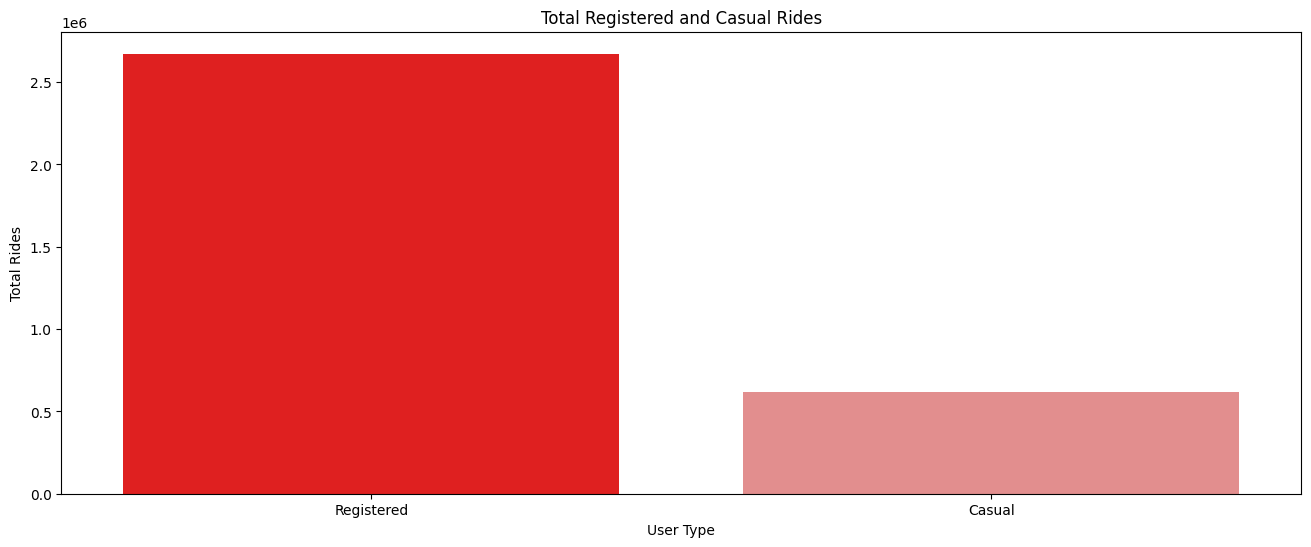

Count of registered users: 2672662
Count of casual users: 620017


In [26]:
registered_sum = df['registered'].sum()
casual_sum = df['casual'].sum()

plt.figure(figsize=(16,6))

# Create a bar chart using the plt.bar() function
sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["red", "lightcoral"])

# Add labels and a title to the plot
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

# Show the plot
plt.show()

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")

Jumlah pengguna bikeshare yang terdaftar lebih tinggi daripada pengguna biasa

### Time series plot dari pengguna bikeshare

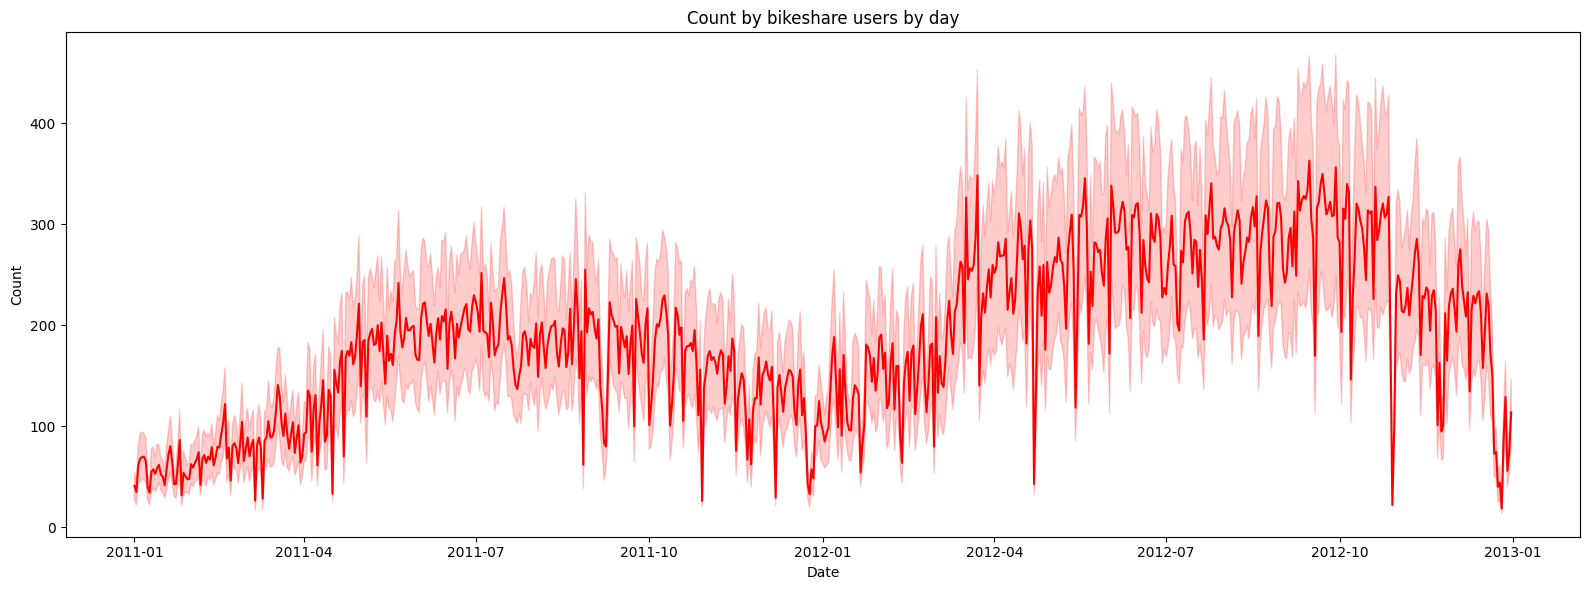

In [27]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count by bikeshare users by day")

# Show the plot
plt.tight_layout()
plt.show()

- Ditandai dengan sedikitnya jumlah perjalan pada awal setiap tahun, kemudian mulai meningkat pada pertengahan tahun, lalu menurun mendekati akhir tahun.
- Jumlah pengguna sepertinya lebih tinggi pada tahun 2012 daripada tahun 2011.

### Boxplot pengguna bikeshare berdasarkan tipe pelanggan

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

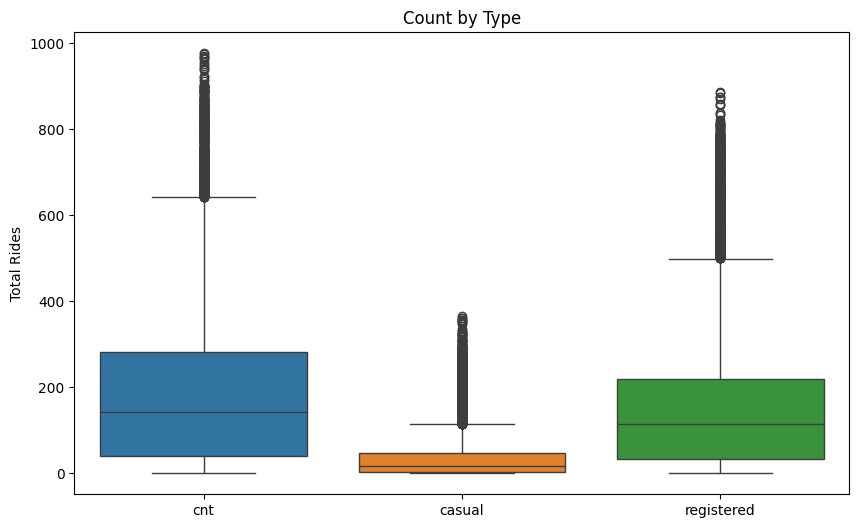

In [28]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df[['cnt', 'casual', 'registered']])

# Add labels and a title to the plot
plt.ylabel("Total Rides")
plt.title("Count by Type")

# Show the plot
plt.show()

Jumlah pengguna bikeshare yang membership lebih banyak dari pada yang casual

### Boxplot pengguna bikeshare berdasarkan tahun

<ipython-input-29-73c8c184096c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of

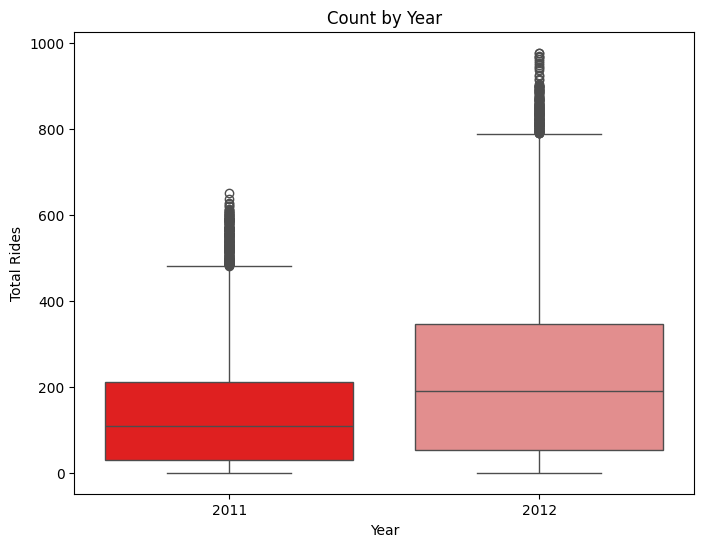

In [29]:
plt.figure(figsize=(8,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="yr",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count by Year")

# Show the plot
plt.show()

Seperti yang terlihat pada grafik garis sebelumnya, dan dikonfirmasi oleh boxplot ini, jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011.

### Boxplots pengguna bikeshare berdasarkan musim

<ipython-input-30-63044d2fd1ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-30-63044d2fd1ff>:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_

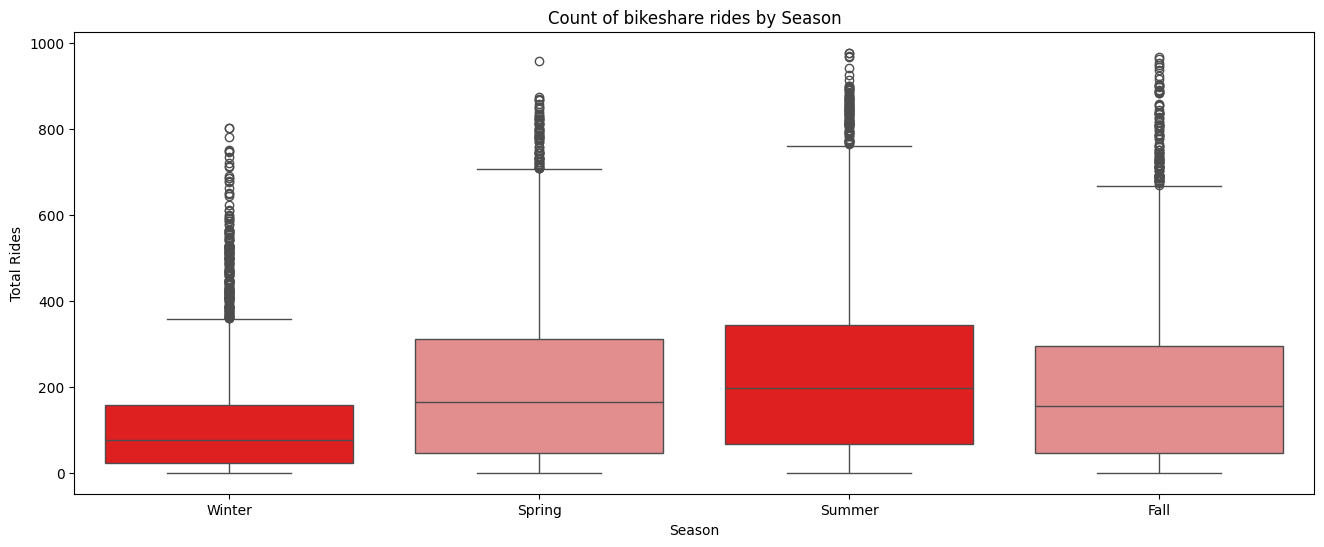

In [30]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

# Show the plot
plt.show()

Jumlah perjalanan bikeshare paling sedikit di winter, dan paling banyak di summer.

### Boxplots pengguna bikeshare berdasarkan bulan

<ipython-input-31-5dded2bfd84d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-31-5dded2bfd84d>:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/

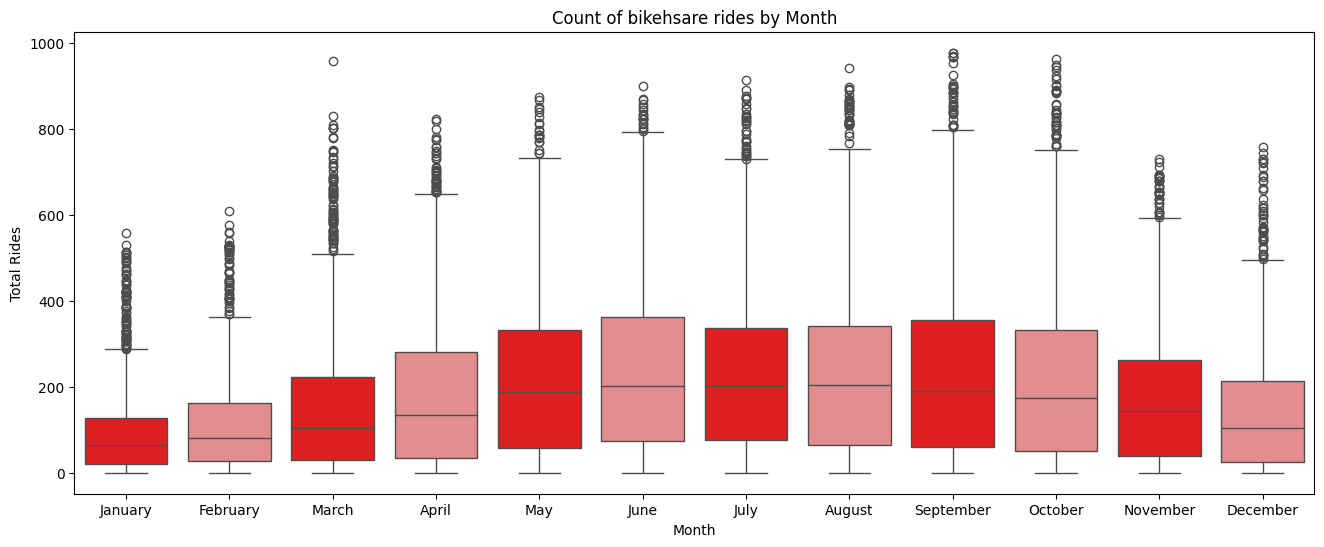

In [31]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="mnth",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Month")

# Show the plot
plt.show()

Seperti yang terlihat pada grafik garis sebelumnya, dan dikonfirmasi oleh boxplot ini, jumlah perjalanan bikeshare cenderung meningkat di pertengahan tahun, dan menurun di awal tahun (Januari dan Februari) dan di akhir tahun (November dan Desember)

### Boxplots pengguna bikeshare berdasarkan weekdays

In [32]:
# order the day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<ipython-input-33-fc0d975b6d51>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-33-fc0d975b6d51>:4: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_

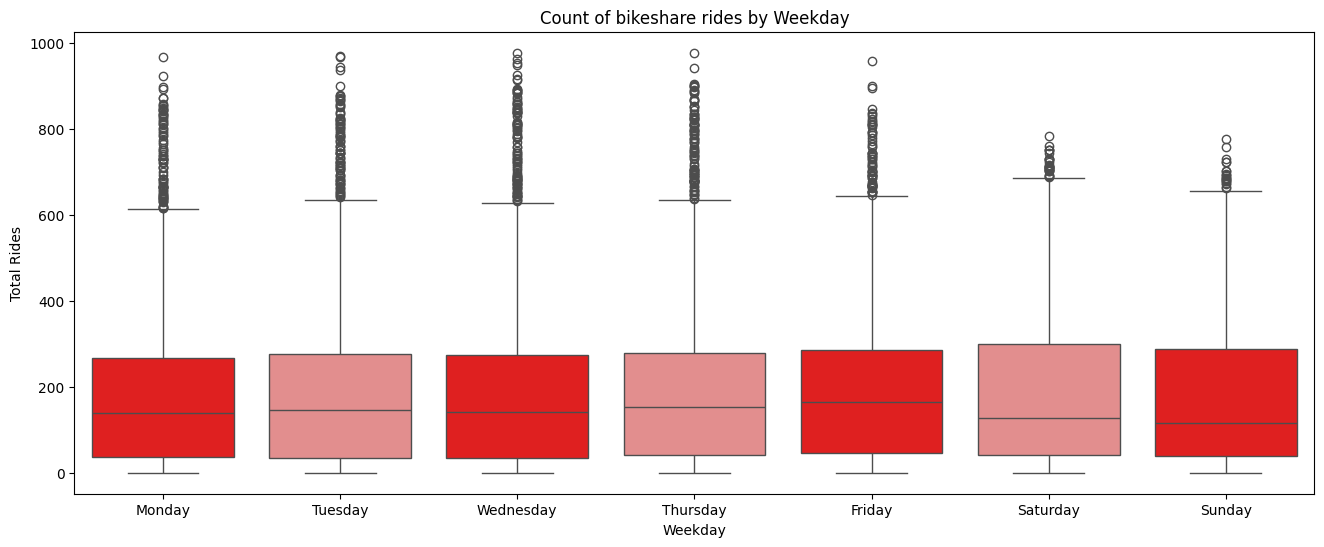

In [33]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="weekday",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"],
    order=day_order
)

# Add labels and a title to the plot
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

# Show the plot
plt.show()

- Boxplot menunjukkan jumlah perjalanan yang cukup mirip di setiap hari kerja
- Terdapat lebih sedikit outlier pada hari Sabtu dan Minggu dibandingkan dengan hari-hari lainnya

### Boxplots dari pengguna bikeshare berdasarkan jam

<ipython-input-34-ee7b9a270b52>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-ee7b9a270b52>:4: UserWarning: 
The palette list has fewer values (2) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/

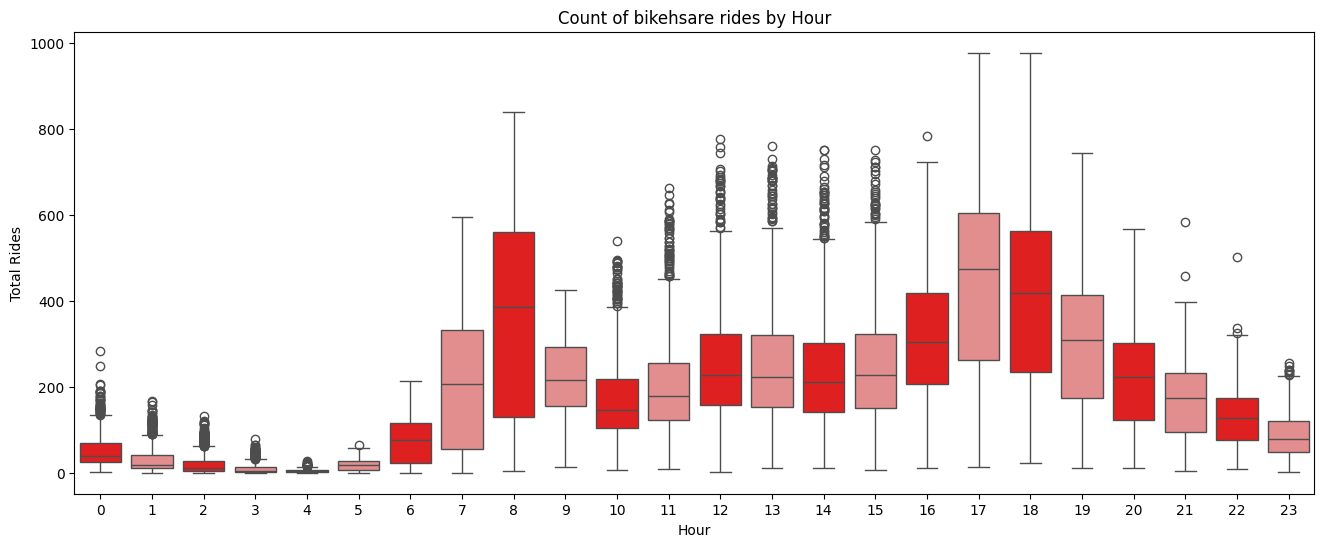

In [34]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="hr",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Hour")

# Show the plot
plt.show()

- Dari tengah malam sampai subuh, merupakan jumlah perjalanan bikeshare terendah
- Mulai meningkat di pagi hari, dan mencapai puncaknya pada pukul 8.00
- Mulai menurun lagi pada siang hari, tetapi mulai pukul 16.00 mulai meningkat lagi dan mencapai puncaknya pada pukul 17.00
- Setelah itu jumlah perjalanan bikeshare menurun sepanjang malam

### Boxplots pengguna bikeshare saat liburan

<ipython-input-35-2ab96ee3c53a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of

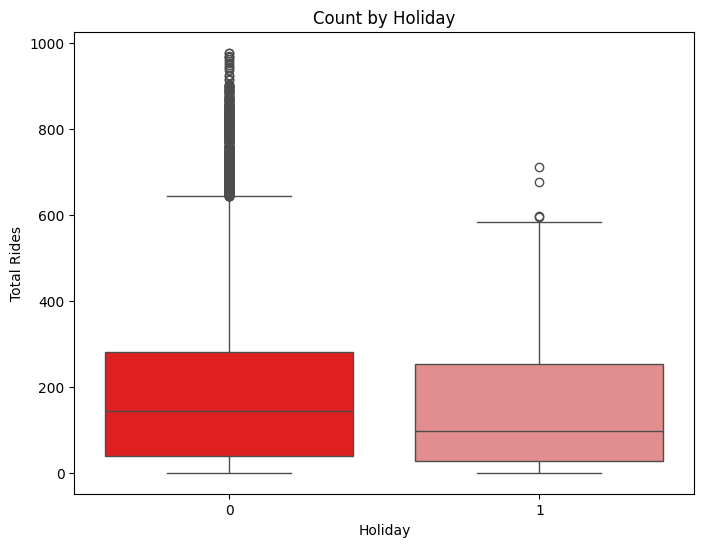

Count of bikeshare users based on holiday:
holiday
0    16879
1      500
Name: count, dtype: int64


In [35]:
plt.figure(figsize=(8,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="holiday",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Holiday")
plt.ylabel("Total Rides")
plt.title("Count by Holiday")

# Show the plot
plt.show()

print('Count of bikeshare users based on holiday:')
print(df['holiday'].value_counts())

Jumlah perjalanan bikeshare pada hari biasa lebih tinggi daripada hari libur, meskipun dapat dimaklumi karena hari libur lebih sedikit daripada hari biasa.

### Boxplots pengguna bikeshare saat hari kerja

<ipython-input-36-ad3609c2e382>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of

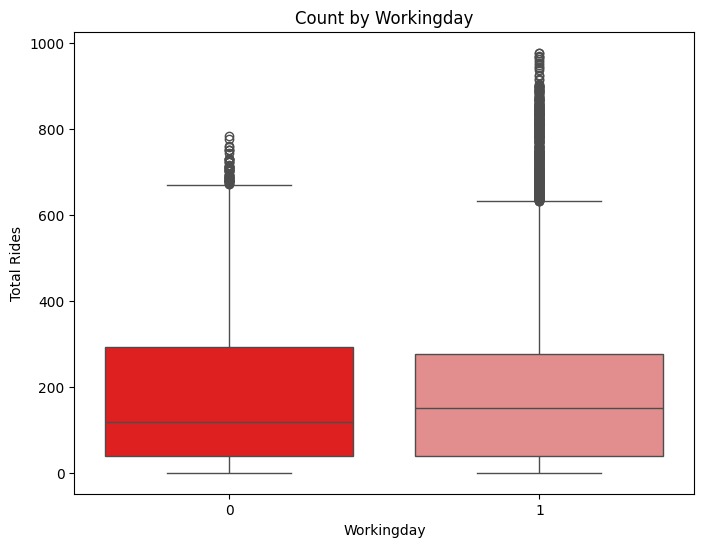

Count of bikeshare users based on working day:
workingday
1    11865
0     5514
Name: count, dtype: int64


In [36]:
plt.figure(figsize=(8,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="workingday",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Workingday")
plt.ylabel("Total Rides")
plt.title("Count by Workingday")

# Show the plot
plt.show()

print('Count of bikeshare users based on working day:')
print(df['workingday'].value_counts())

Jumlah perjalanan bikeshare pada hari kerja lebih tinggi daripada hari libur, meskipun dapat dimaklumi karena hari libur dan akhir pekan lebih sedikit dibandingkan dengan hari kerja

### Scatterplot berdasarkan temperature, feeling temperature, humidity, and windspeed dibandingkan dengan total pengguna bikeshare

In [37]:
# extract the variables for scatterplot
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = df[scatter_vars]

df_scatter.head(3)

,cnt,temp,atemp,hum,windspeed
0,16,9.84,14.395,81.0,0.0
1,40,9.02,13.635,80.0,0.0
2,32,9.02,13.635,80.0,0.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

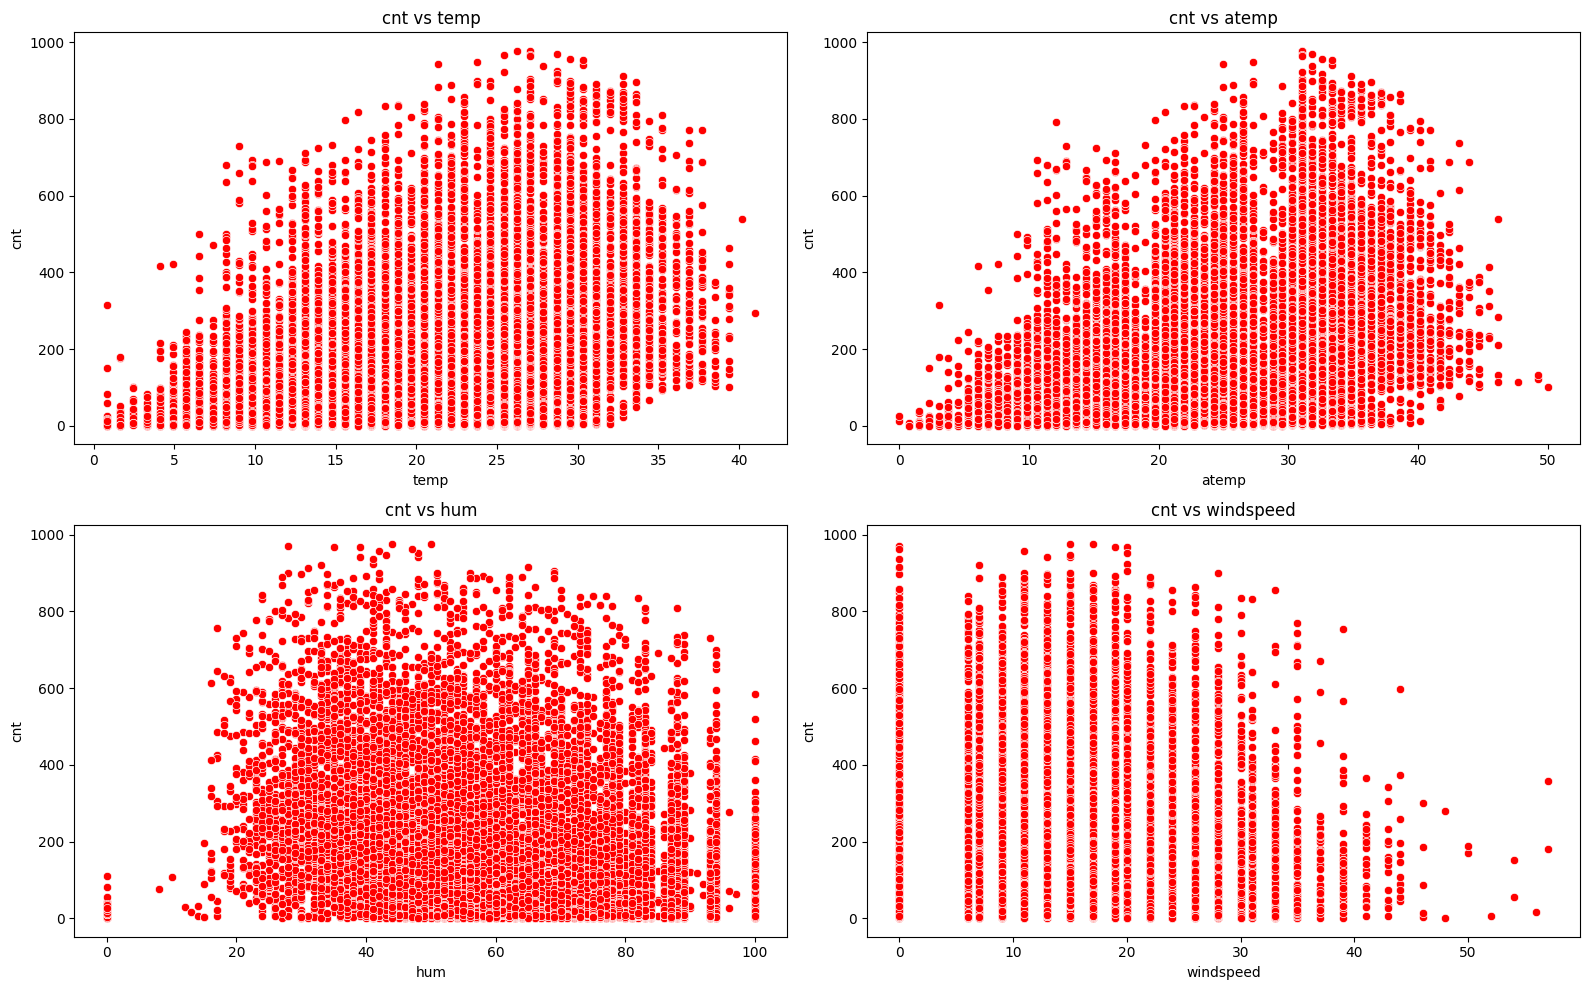

In [39]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Iterate over the other variables and create a scatterplot for each one
for i, col in enumerate(df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=df, ax=axs[i // 2, i % 2], color='red')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

- Plot sebaran cnt vs temp dan cnt vs atemp menunjukkan bahwa jumlah perjalanan bikeshare meningkat seiring dengan peningkatan suhu. Sepertinya ada korelasi antara suhu dan jumlah perjalanan bikeshare.
- Plot sebaran hum vs cnt tidak menunjukkan adanya korelasi.
- Scatter plot cnt vs windspeed menunjukkan bahwa jumlah perjalanan bikeshare terlihat menurun seiring dengan meningkatnya windspeed.

### Correlation and Correlation Heat Map

In [40]:
df.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234


<Axes: >

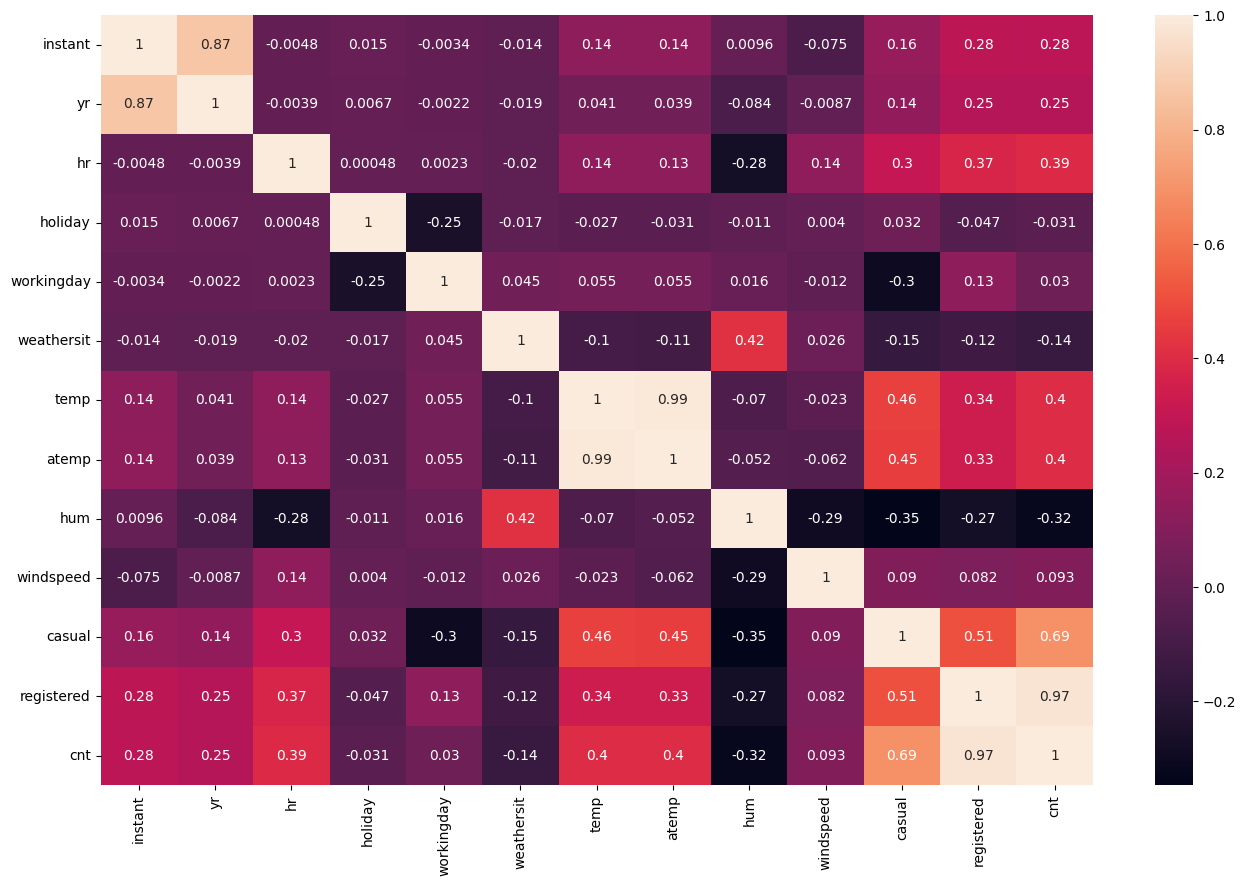

In [41]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

- Terdapat korelasi yang kuat antara variabel pengguna biasa dan terdaftar vs cnt, meskipun hal ini sudah diperkirakan sebelumnya karena peningkatan pengguna biasa dan terdaftar akan mempengaruhi cnt (jumlah perjalanan) secara langsung.
- Terdapat korelasi yang sedang antara hr, temp, dan atemp vs jumlah perjalanan bikeshare.

## Visualization and Explanatory Data Analysis
---

Dalam bagian ini, kita akan menjawab pertanyaan-pertanyaan yang telah disebutkan sebelumnya.

1. Bagaimana tren jumlah pengguna bike-sharing dalam beberapa tahun terakhir?
2. Bagaimana pola penggunaan layanan bike-sharing berdasarkan waktu?
3. Pada musim apa saja jumlah pengguna layanan bike-sharing tertinggi?
4. Bagaimana pola penggunaan layanan bike-sharing berdasarkan hari dalam seminggu?
5. Apakah ada korelasi antara suhu yang mengindikasikan kondisi ketika penggunaan layanan bike-sharing tinggi?
6. Apakah cuaca mempengaruhi penggunaan bikeshare?

### Bagaimana tren jumlah pengguna bike-sharing dalam beberapa tahun terakhir?

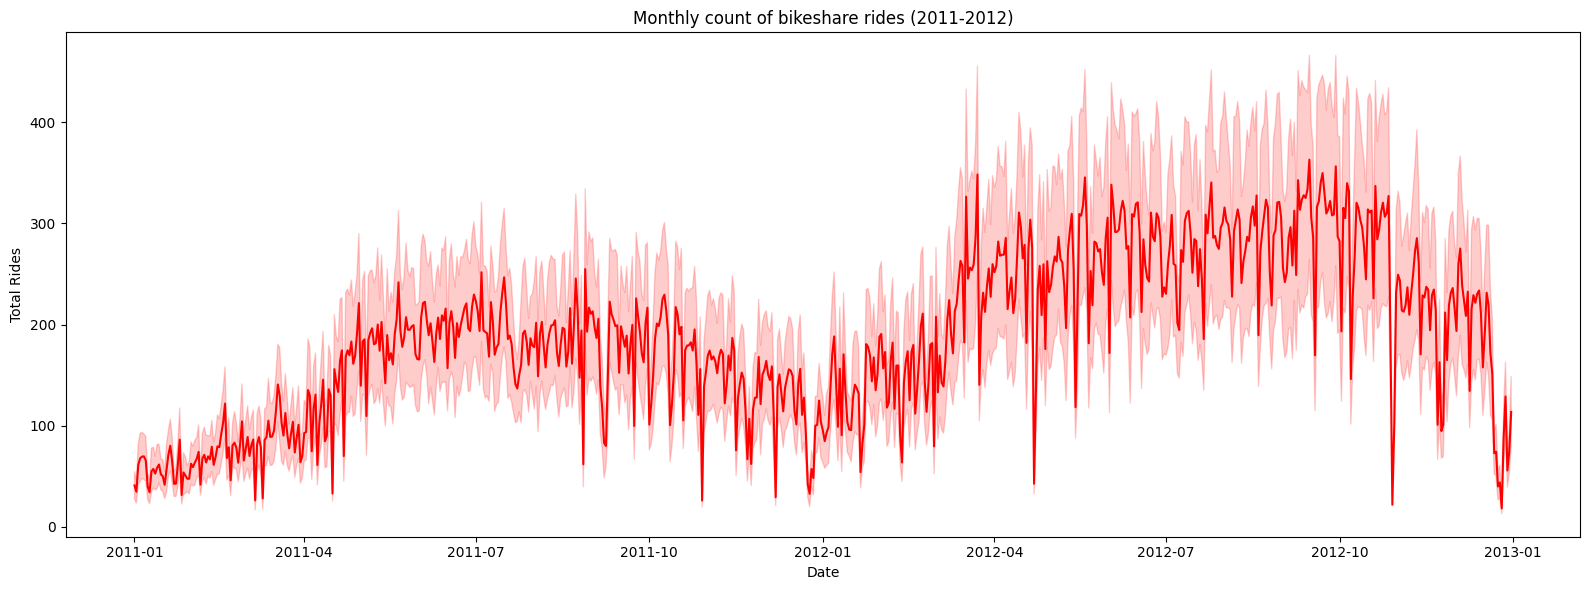

In [42]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

Agar lebih mudah diinterpretasikan, mari kita ubah ke angka bulanan. Dengan menggunakan `resample`, kita akan menggabungkan data time series (dari harian ke bulanan)

In [43]:
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head(3)

<ipython-input-43-9f5602c47b5b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users_df = df.resample(rule='M', on='dteday').agg({


,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045


In [44]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')

In [45]:
monthly_users_df.head(3)

,casual,registered,cnt
dteday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045


In [46]:
monthly_users_df = monthly_users_df.reset_index()

In [47]:
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})

In [48]:
monthly_users_df.head()

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


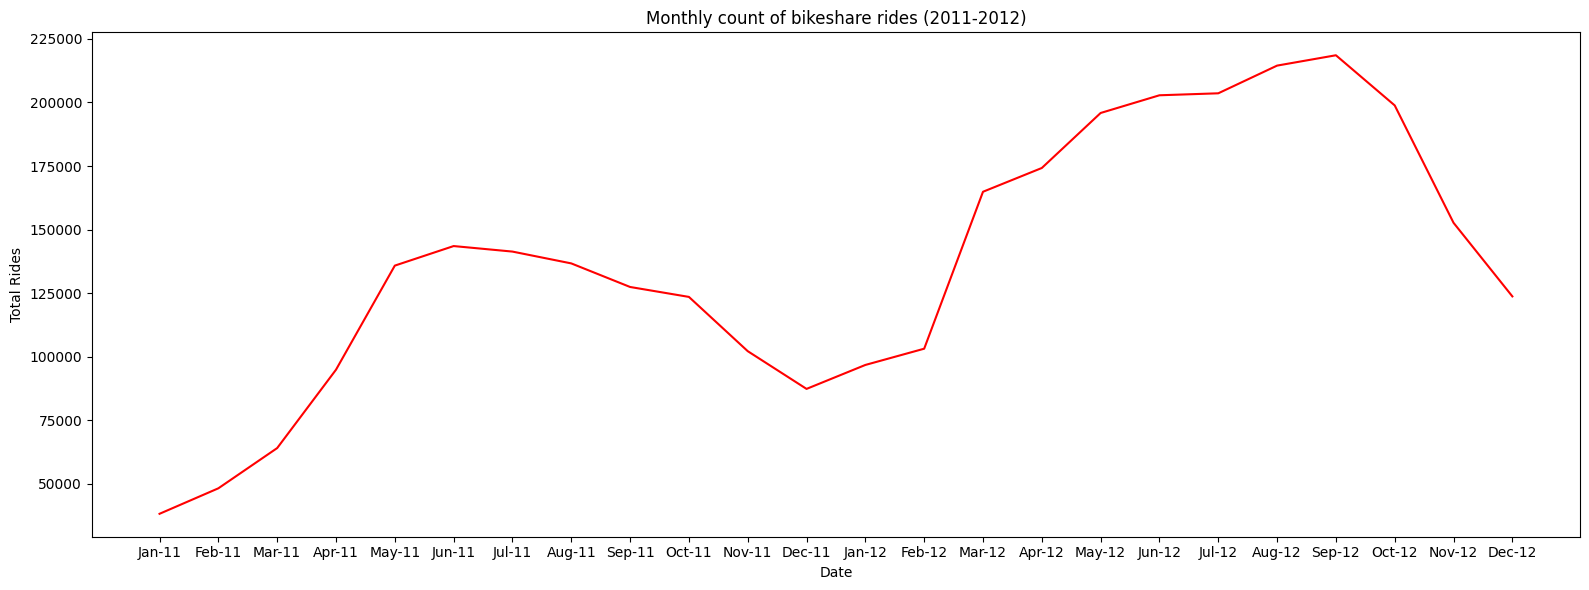

In [49]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="cnt", data=monthly_users_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

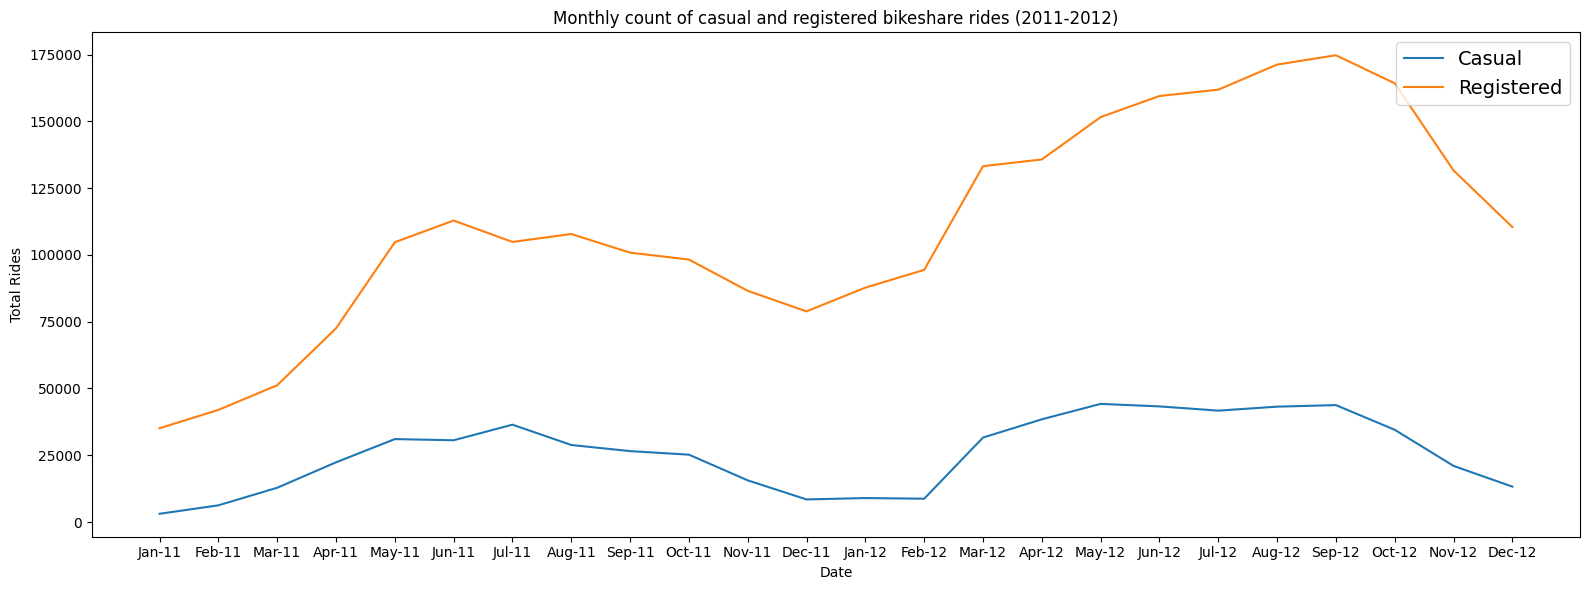

In [50]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011.
2. Kita dapat melihat adanya musim dalam 2 tahun tersebut. Jumlah perjalanan bikeshare biasanya dimulai dengan jumlah yang rendah pada awal tahun, kemudian mulai meningkat pada kuartal kedua, lalu mulai menurun pada kuartal keempat.
3. Jumlah perjalanan bikeshare yang ter-register lebih tinggi daripada perjalanan biasa, meskipun keduanya menunjukkan tren yang sama sepanjang tahun.

### Bagaimana pola penggunaan layanan bike-sharing berdasarkan waktu dalam sehari?

In [51]:
hourly_users_df = df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_users_df.head()

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [52]:
hourly_users_df = hourly_users_df.reset_index()

In [53]:
hourly_users_df.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


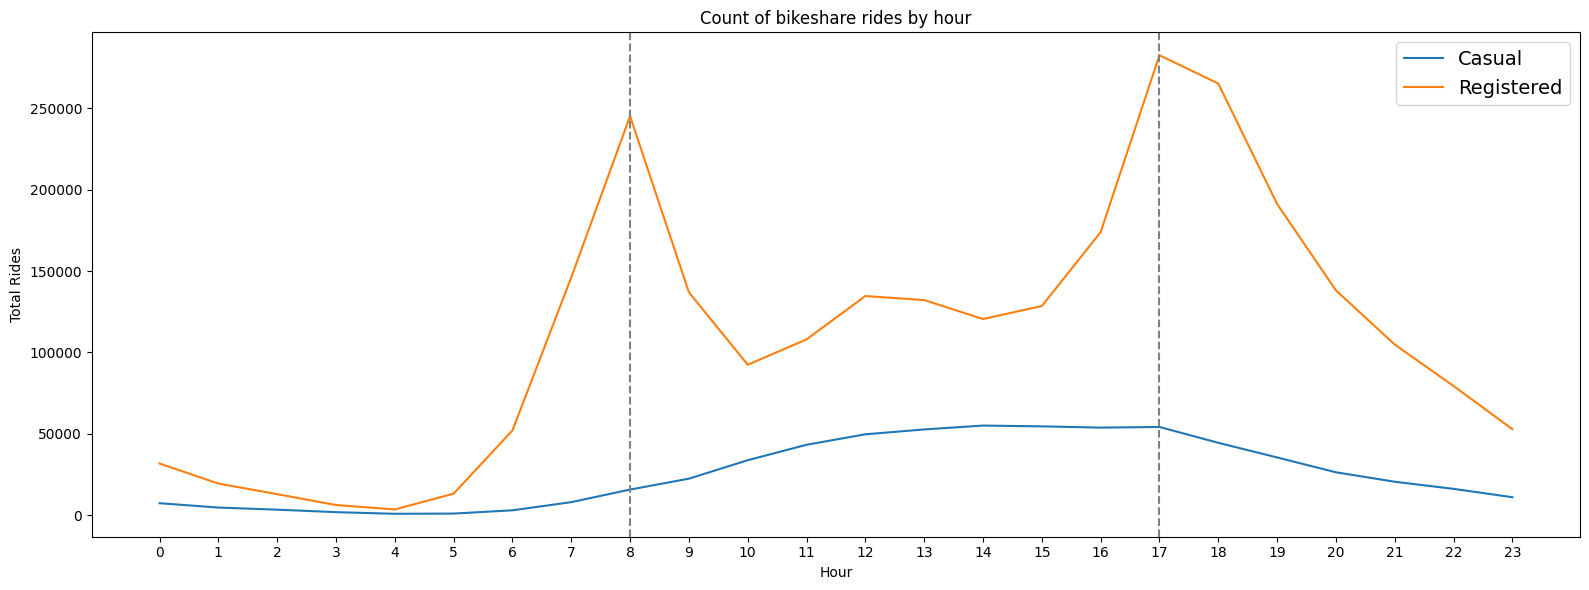

In [54]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Registered')

# Add labels and a title to the plot
x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by hour")

# highlight the important data label in the chart
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. Grafik di atas menunjukkan pola yang sangat jelas tentang perbedaan yang sangat nyata antara pengguna bikeshare biasa dan terdaftar berdasarkan jam dalam sehari.
2. Perjalanan bikeshare terdaftar menunjukkan puncaknya pada pukul 8.00 dan 17.00. Mengingat kedua jam tersebut merupakan waktu dimana orang pergi dan pulang kerja, ada kemungkinan bahwa pengguna bikeshare terregistrasi menggunakan sepeda untuk pergi ke kantor.
3. Di sisi lain, pengguna bikeshare kasual menunjukkan frekuensi yang lebih tinggi pada siang hari, kemudian mulai menurun setelah pukul 17.00

### Musim apa yang memiliki jumlah pengguna bike-sharing tertinggi?

In [55]:
seasonly_users_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [56]:
seasonly_users_df = seasonly_users_df.reset_index()

In [57]:
seasonly_users_df

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


In [58]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

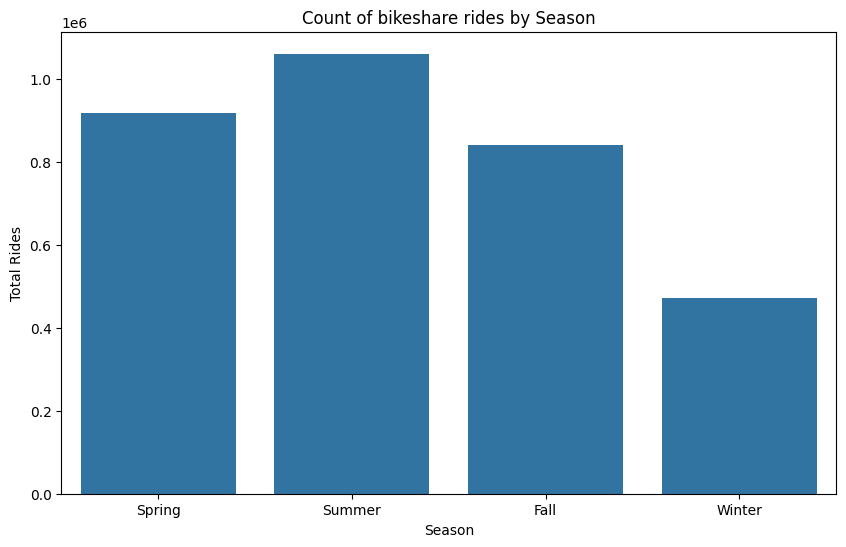

In [59]:
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

- Jumlah pengguna bikeshare paling tinggi pada summer, dan paling rendah pada winter.
- Selanjutnya, untuk melihat perbedaan antara pola pengguna bikeshare biasa dan yang teregistrasi pada setiap musim, kami akan melakukan unpivot pada `season_users_df`

In [60]:
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [61]:
seasonly_users_df_unpivoted

,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


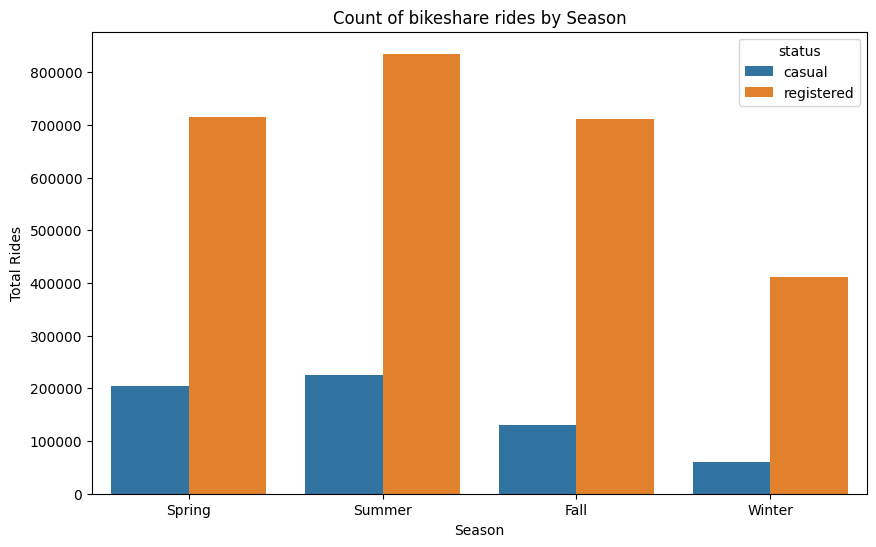

In [62]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

**Insight**
- Jumlah perjalanan bikeshare tertinggi selama summer, dan terendah selama winter.
- Tidak ada perbedaan besar antara perjalanan casual dan register, keduanya tertinggi di summer dan terendah di winter.

### Bagaimana pola penggunaan layanan bikesharing berdasarkan hari dalam seminggu?

In [63]:
weekday_users_df = df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users_df

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


In [64]:
weekday_users_df = weekday_users_df.reset_index()

In [65]:
weekday_users_df

,weekday,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


In [66]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

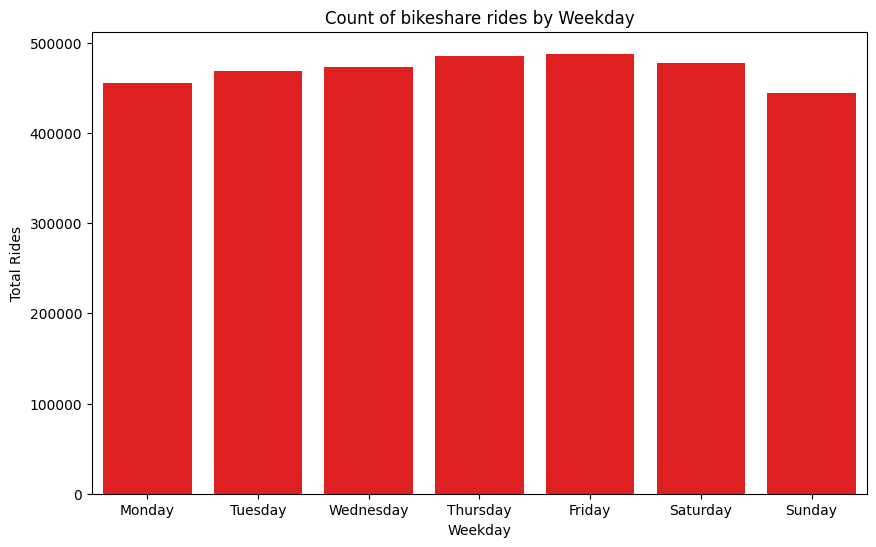

In [67]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='cnt', data=weekday_users_df, order=day_order, color='red')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

- Sepertinya jumlah pengguna bikeshare tersebar cukup merata selama hari kerja
- Selanjutnya, untuk melihat perbedaan antara pola pengguna bikeshare biasa dan terdaftar pada hari kerja, kita akan menguraikan `weekday_users_df`

In [68]:
weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [69]:
weekday_users_df_unpivoted

,weekday,status,count
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


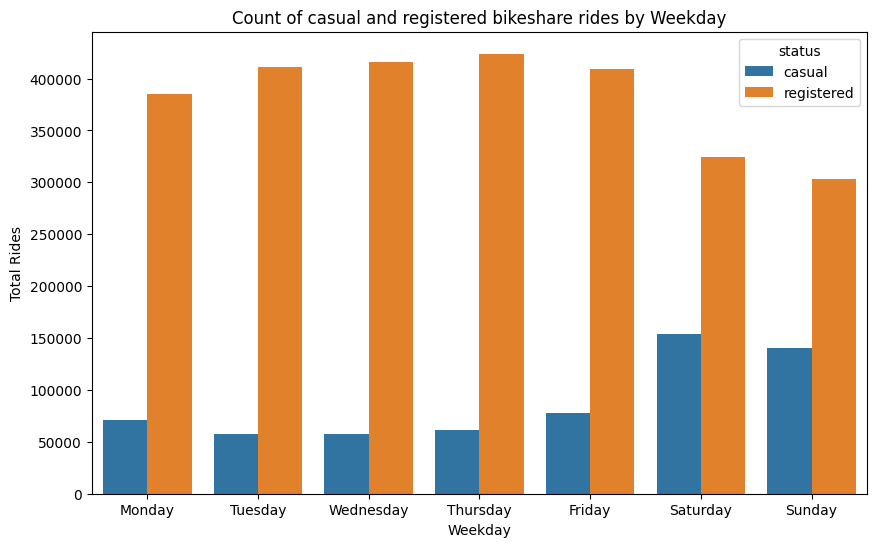

In [70]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='count', data=weekday_users_df_unpivoted, order=day_order, hue='status')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of casual and registered bikeshare rides by Weekday")

plt.show()

**Insight**
1. Ketika kami memisahkan jumlah perjalanan bikeshare antara pengguna biasa dan pengguna terdaftar, kami melihat pola yang menarik di sini.
2. Jumlah pengguna biasa lebih tinggi pada akhir pekan, sementara untuk pengguna terdaftar lebih tinggi pada hari kerja.
3. Menambah pengetahuan yang kami temukan pada perjalanan per jam, hal ini semakin menunjukkan bahwa pengguna yang teregistrasi mungkin menggunakan sepeda untuk bekerja secara rutin pada hari kerja, sementara pengguna biasa menggunakan sepeda untuk bersantai di akhir pekan.

### Apakah ada hubungan antara suhu yang terjadi saat menggunakan layanan bike-sharing?

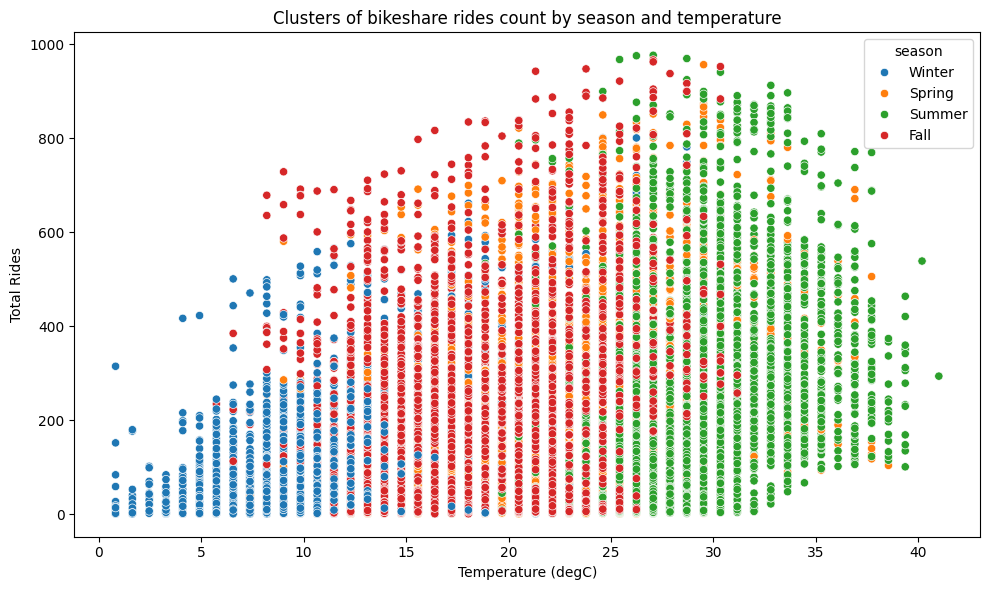

In [71]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=df, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature")

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. Pada grafik di atas, pada saat suhu udara lebih rendah, jumlah perjalanan bikeshare juga rendah. Hal ini terjadi selama musim dingin.
2. Ketika suhu tinggi, jumlah perjalanan bikeshare juga meningkat. Hal ini terjadi pada musim panas.
3. Namun, tampaknya ada “sweet-spot” suhu di mana jumlah perjalanan bikeshare paling tinggi. Kita bisa melihatnya pada kelompok musim gugur dan musim panas. “sweet-spot" suhu antara 20 derajat Celcius hingga 30 derajat Celcius.
4. Pada hari-hari dengan kondisi suhu tersebut, kita dapat mengharapkan jumlah perjalanan bikeshare akan tinggi.

### Apakah cuaca mempengaruhi penggunaan bikeshare?

Mari kita mengingat kembali situasi cuaca dalam variabel `weathersit`:

- 1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
- 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut

In [72]:
weatherly_users_df = df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weatherly_users_df

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


In [73]:
weatherly_users_df = weatherly_users_df.reset_index()

In [74]:
weatherly_users_df

,weathersit,casual,registered,cnt
0,1,462745,1875428,2338173
1,2,134481,661471,795952
2,3,22783,135548,158331
3,4,8,215,223


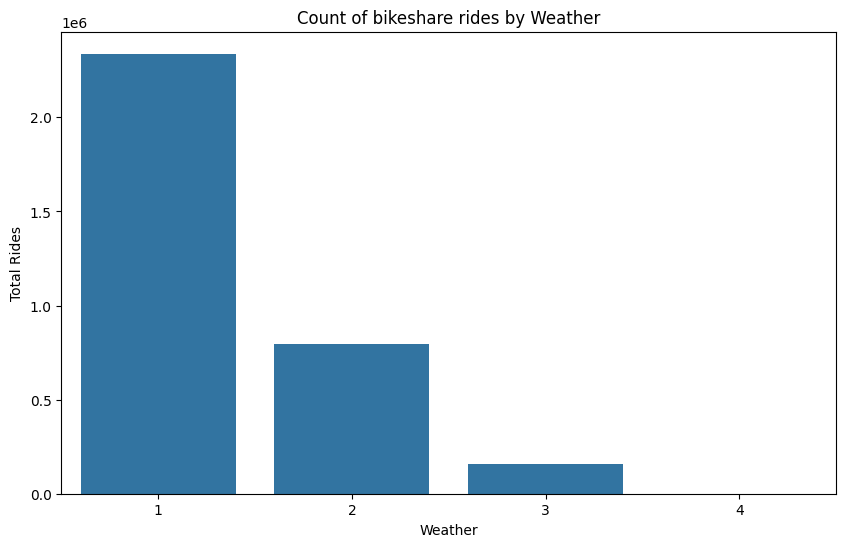

In [75]:
plt.figure(figsize=(10,6))

sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df)

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weather")

plt.show()

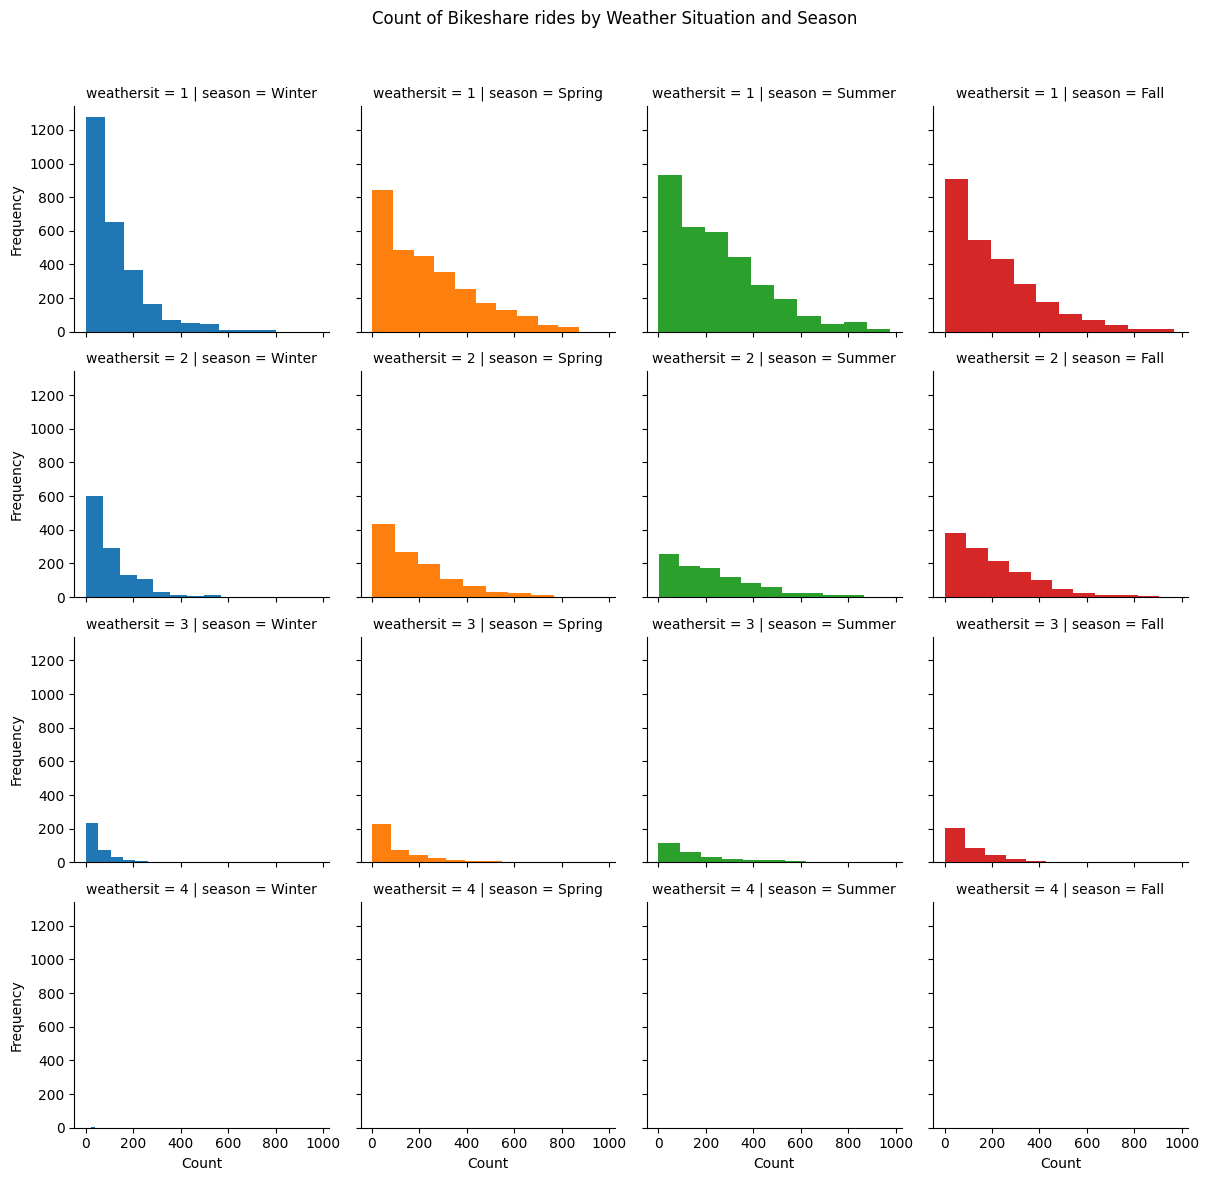

In [76]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context(font_scale=0.9)

g = sns.FacetGrid(data=df,
               col='season',
               row='weathersit',hue='season')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Bikeshare rides by Weather Situation and Season')

g.set_xlabels('Count')
g.set_ylabels('Frequency')

plt.show()

**Insight**
1. Jumlah penggunaan kendaraan bikeshare sebagian besar dipengaruhi oleh kondisi cuaca. Jumlah pengguna bikeshare jauh lebih sedikit saat hujan lebat dan badai petir dibandingkan dengan cuaca yang cerah.
2. Kondisi ini berlaku untuk semua musim.

## Conclusion
---

### Bagaimana tren jumlah pengguna sepeda dalam beberapa tahun terakhir?

Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011. Kedua tahun tersebut menunjukkan tren dan musim yang sama, dengan jumlah perjalanan meningkat di pertengahan tahun dan menurun di awal dan akhir tahun.

### Bagaimana statistik penggunaan bike-sharing berdasarkan waktu?

 - Untuk pengguna registered, jumlah perjalanan mencapai puncaknya pada pukul 8:00 pagi dan 5:00 sore, yang menunjukkan bahwa mereka mungkin menggunakan sepeda untuk pergi ke tempat kerja.
 - Untuk pengguna casual, jumlah perjalanan mulai meningkat pada siang hari dan menurun pada malam hari.

### Musim apa yang memiliki jumlah pengguna sepeda terbanyak?

Perjalan bike-share tertinggi terjadi pada summer dan paling sedikit saat winter

### Bagaimana pola penggunaan layanan bike-sharing berdasarkan hari dalam seminggu?

 - Untuk pengguna yang teregistrasi, jumlah perjalanan lebih tinggi selama hari kerja. Hal ini konsisten dengan temuan pada pertanyaan 2, yang menunjukkan bahwa pengguna terdaftar kemungkinan besar menggunakan sepeda untuk pergi ke tempat kerja.
 - Untuk pengguna casual, jumlah perjalanan lebih tinggi pada akhir pekan dibandingkan dengan hari kerja, yang mengindikasikan bahwa mereka menggunakan sepeda untuk kegiatan rekreasi di akhir pekan.

### Apakah ada hubungan antara suhu yang terjadi saat menggunakan layanan bike-sharing?

 - Ya, terdapat korelasi yang sedang antara suhu dan jumlah perjalanan bikeshare.
 - Jumlah wahana paling sedikit pada suhu yang lebih dingin, yang terjadi selama musim dingin, dan mulai meningkat seiring dengan meningkatnya suhu, yang terjadi pada musim panas. Namun, ada “sweet spot” atau kisaran suhu ketika jumlah kendaraan paling tinggi, yaitu antara 20°C dan 30°C. Kisaran suhu ini biasanya terjadi selama musim panas dan musim gugur.
 - Pada hari-hari dengan kondisi suhu seperti ini, kita dapat mengharapkan jumlah wahana bikeshare menjadi tinggi.

### Apakah cuaca mempengaruhi penggunaan bikeshare?

 Ya, jumlah pengguna secara signifikan lebih tinggi saat cuaca cerah daripada saat kondisi cuaca yang lebih ekstrem.